In [1]:
import numpy as np
import pandas as pd

In [2]:
train1=train = pd.read_csv('../train.csv')
train = pd.read_csv('../train.csv')
test=pd.read_csv('../test_x.csv')

In [3]:
train.info() #agegroup, gender, race, religion => 수치형으로 형변환 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

# 데이터 Featuring

In [4]:
train[['age_group', 'gender', 'race', 'religion']]

,age_group,gender,race,religion
0,30s,Female,White,Other
1,20s,Female,Asian,Hindu
2,30s,Male,White,Other
3,20s,Female,Asian,Hindu
4,20s,Male,White,Agnostic
...,...,...,...,...
45527,10s,Female,White,Jewish
45528,30s,Male,White,Atheist
45529,10s,Female,White,Christian_Other
45530,40s,Male,White,Atheist


- agegroup 형변환

In [5]:
train.age_group = train.age_group.str[:2].astype(np.int64)
test.age_group = test.age_group.str[:2].astype(np.int64)

- gender 형변환

In [6]:
train.gender = train.gender.map({'Male':0, 'Female':1})
test.gender = test.gender.map({'Male':0, 'Female':1})

- race 형변환

In [7]:
train.race.unique()

array(['White', 'Asian', 'Other', 'Black', 'Native American', 'Arab',
       'Indigenous Australian'], dtype=object)

In [8]:
train.race = train.race.map({'Asian':0, 
                             'Arab':1, 
                             'Black':2, 
                             'Indigenous Australian':3, 
                             'Native American':4, 
                             'White':5, 
                             'Other':6 })
test.race = test.race.map({'Asian':0, 
                             'Arab':1, 
                             'Black':2, 
                             'Indigenous Australian':3, 
                             'Native American':4, 
                             'White':5, 
                             'Other':6 })

- religion 형변환

In [9]:
train.religion.unique()

array(['Other', 'Hindu', 'Agnostic', 'Atheist', 'Christian_Other',
       'Christian_Catholic', 'Muslim', 'Buddhist', 'Christian_Protestant',
       'Jewish', 'Christian_Mormon', 'Sikh'], dtype=object)

In [10]:
train.religion = train.religion.map({"Agnostic":0, 
                                     "Atheist":1, 
                                     "Buddhist":2, 
                                     "Christian_Catholic":3, 
                                     "Christian_Mormon":4, 
                                     "Christian_Protestant":5, 
                                     "Christian_Other":6, 
                                     "Hindu":7, 
                                     "Jewish":8, 
                                     "Muslim":9, 
                                     "Sikh":10, 
                                     "Other":11})
test.religion = test.religion.map({"Agnostic":0, 
                                     "Atheist":1, 
                                     "Buddhist":2, 
                                     "Christian_Catholic":3, 
                                     "Christian_Mormon":4, 
                                     "Christian_Protestant":5, 
                                     "Christian_Other":6, 
                                     "Hindu":7, 
                                     "Jewish":8, 
                                     "Muslim":9, 
                                     "Sikh":10, 
                                     "Other":11})

# 데이터 시각화

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\jw517\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
Qli = ['QaA','QbA','QcA','QdA','QeA','QfA','QgA','QhA','QiA','QjA','QkA','QlA','QmA','QnA','QoA','QpA','QqA','QrA','QsA','QtA']

In [13]:
df = pd.DataFrame(index=[x for x in range(1,6)])
for que in Qli:
    Qdf = pd.DataFrame(train[que].value_counts(), index=[x for x in range(1,6)])
    df = pd.concat([df, Qdf], axis=1)
df

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
1,18161,13427,5809,25238,17781,19577,16329,20621,8233,5130,4382,2787,5939,14428,8851,9833,11031,10790,6663,9301
2,12912,7830,6161,11806,10459,12794,9947,7169,9984,6696,5188,1566,6400,10661,7800,9320,9222,10905,5300,7642
3,7147,4052,3596,4541,7321,3663,4072,6053,5961,5080,6056,3530,4854,4518,4888,4315,8053,7030,7389,5254
4,5024,10112,11995,2569,4976,4924,7770,6022,9078,14091,8800,7795,15196,9048,12593,11875,10432,9166,14021,10150
5,2288,10111,17971,1378,4995,4574,7414,5667,12276,14535,21106,29854,13143,6877,11400,10189,6794,7641,12159,13185


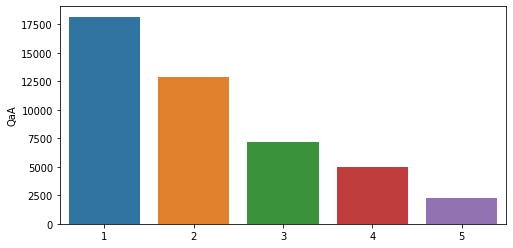

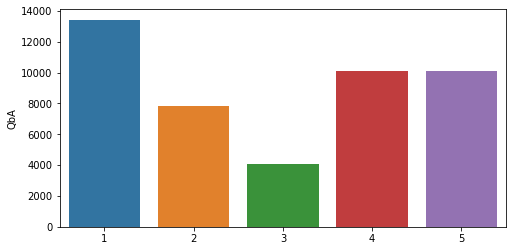

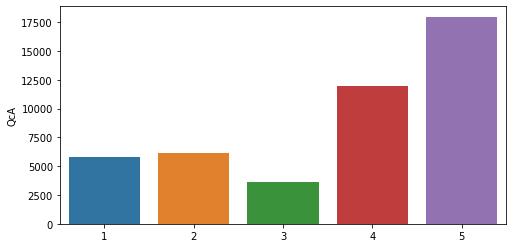

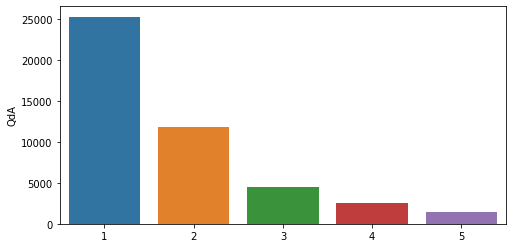

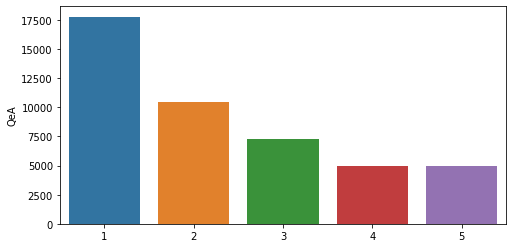

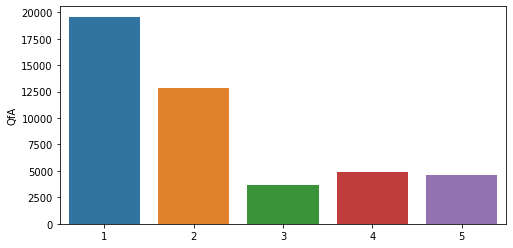

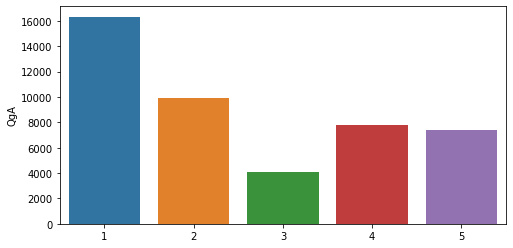

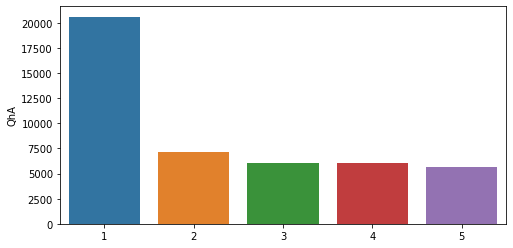

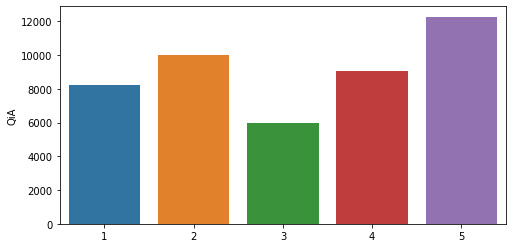

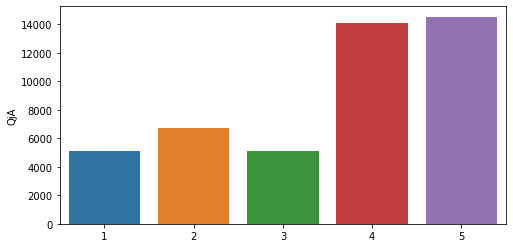

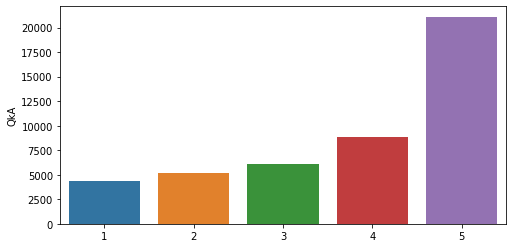

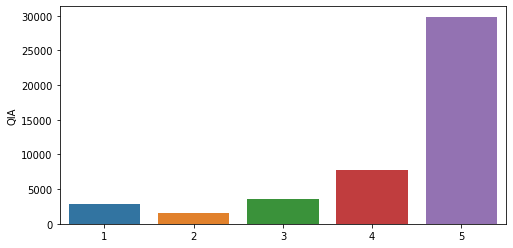

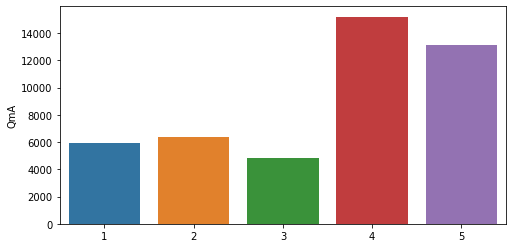

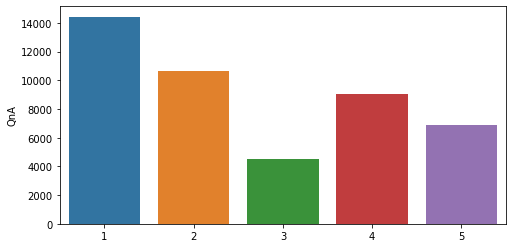

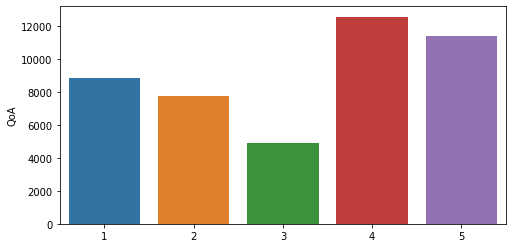

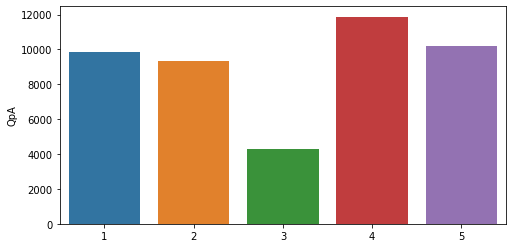

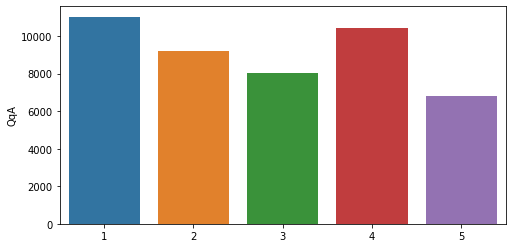

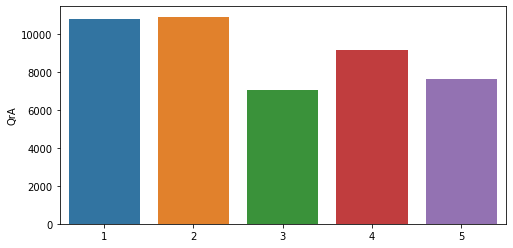

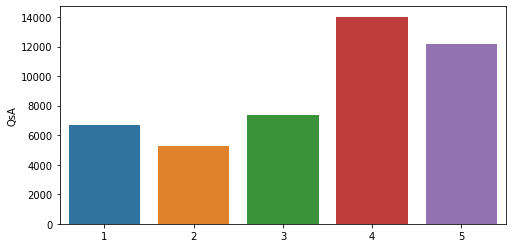

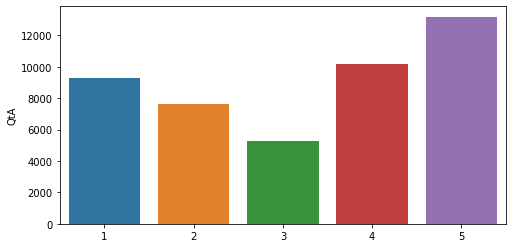

In [14]:
for que in Qli:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=df.index, y=df[que], data=df)


# score 계산


In [15]:
Qli = ['QaA','QbA','QcA','QdA','QeA','QfA','QgA','QhA','QiA','QjA','QkA','QlA','QmA','QnA','QoA','QpA','QqA','QrA','QsA','QtA']

In [17]:
Qli_m = ['QaA','QdA','QeA','QfA','QgA','QiA','QkA','QnA','QqA','QrA']

In [18]:
Qli = ['QaA','QbA','QcA','QdA','QeA','QfA','QgA','QhA','QiA','QjA','QkA','QlA','QmA','QnA','QoA','QpA','QqA','QrA','QsA','QtA']

In [19]:
Qli_ns = ['QbA','QcA','QeA','QfA','QhA','QjA','QkA','QmA','QoA','QqA','QrA','QsA']
len(Qli_ns)

12

In [20]:
train[Qli_ns]

,QbA,QcA,QeA,QfA,QhA,QjA,QkA,QmA,QoA,QqA,QrA,QsA
0,4.0,5.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0
1,5.0,3.0,1.0,3.0,1.0,3.0,5.0,1.0,1.0,5.0,1.0,4.0
2,1.0,1.0,5.0,1.0,1.0,2.0,5.0,2.0,2.0,5.0,4.0,1.0
3,3.0,4.0,1.0,2.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0
4,1.0,5.0,1.0,2.0,1.0,5.0,5.0,4.0,1.0,5.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45527,5.0,4.0,1.0,1.0,1.0,4.0,4.0,4.0,2.0,2.0,1.0,5.0
45528,3.0,4.0,3.0,2.0,1.0,5.0,2.0,3.0,4.0,2.0,3.0,4.0
45529,1.0,1.0,5.0,4.0,1.0,1.0,5.0,1.0,1.0,5.0,5.0,3.0
45530,3.0,4.0,1.0,1.0,1.0,1.0,5.0,4.0,1.0,4.0,4.0,4.0


In [21]:
corr_ns=train[Qli_ns].corr()

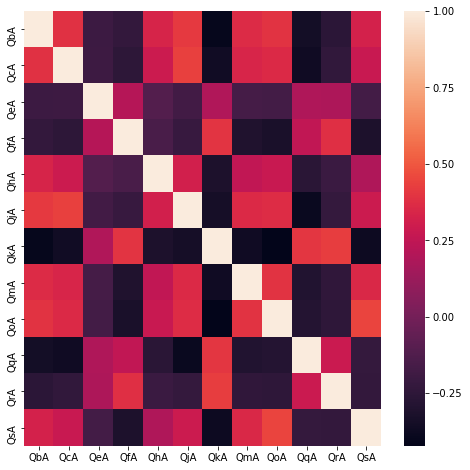

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_ns)

In [23]:
Qli_m = ['QaA','QdA','QeA','QfA','QgA','QiA','QkA','QnA','QqA','QrA']

In [24]:
train[Qli_m]=6-train[Qli_m]
test[Qli_m]=6-test[Qli_m]
train[Qli_m]

,QaA,QdA,QeA,QfA,QgA,QiA,QkA,QnA,QqA,QrA
0,3.0,5.0,4.0,1.0,4.0,1.0,2.0,1.0,4.0,4.0
1,1.0,1.0,5.0,3.0,5.0,1.0,1.0,1.0,1.0,5.0
2,2.0,2.0,1.0,5.0,2.0,3.0,1.0,2.0,1.0,2.0
3,3.0,3.0,5.0,4.0,2.0,1.0,3.0,2.0,3.0,2.0
4,5.0,4.0,5.0,4.0,5.0,1.0,1.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
45527,4.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0
45528,4.0,5.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0
45529,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
45530,5.0,4.0,5.0,5.0,5.0,1.0,1.0,3.0,2.0,2.0


In [25]:
train['Score']=train[Qli].mean(axis=1)
test['Score']=test[Qli].mean(axis=1)
train['Score']

0        2.95
1        2.60
2        1.90
3        3.35
4        3.00
         ... 
45527    4.15
45528    3.80
45529    1.50
45530    2.90
45531    3.40
Name: Score, Length: 45532, dtype: float64

In [26]:
train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Score
0,0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,...,1,0,1,1,0,1,0,1,1,2.95
1,1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,...,1,0,1,1,0,1,0,1,1,2.60
2,2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,...,1,0,1,1,1,1,0,1,1,1.90
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,...,0,0,0,1,0,1,0,1,1,3.35
4,4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,...,1,1,1,1,0,1,1,1,1,3.00



## 시간 칼럼처리?


In [27]:
# Qli = ['QaA','QbA','QcA','QdA','QeA','QfA','QgA','QhA','QiA','QjA','QkA','QlA','QmA','QnA','QoA','QpA','QqA','QrA','QsA','QtA']

In [28]:
# import re

# E=re.compile('.E$')
# time=[]
# for i in train.columns:
#     v=E.findall(i)
#     if len(v)!=0:
#         time.append(i[0:])

In [29]:
tp_s=train[['tp01', 'tp02', 'tp03', 'tp04','tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10','Score']].corr()


## tp__(01~07) : items were rated "I see myself as:" _____ such that?

tp01 : Extraverted, enthusiastic.
tp02 : Critical, quarrelsome.
tp03 : Dependable, self-disciplined.
tp04 : Anxious, easily upset.
tp05 : Open to new experiences, complex.
tp06 : Reserved, quiet.
tp07 : Sympathetic, warm.
tp08 : Disorganized, careless.
tp09 : Calm, emotionally stable.
tp10 : Conventional, uncreative.


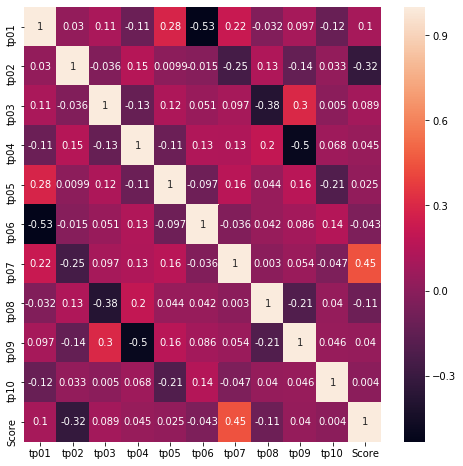

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(tp_s,annot=True)


## 다중공선성 제거


In [31]:
corr=train.iloc[:,41:].corr()

In [32]:
corr[abs(corr)>=0.7].count()

age_group     1
education     1
engnat        1
familysize    1
gender        1
hand          1
married       1
race          1
religion      1
tp01          1
tp02          1
tp03          1
tp04          1
tp05          1
tp06          1
tp07          1
tp08          1
tp09          1
tp10          1
urban         1
voted         1
wf_01         1
wf_02         1
wf_03         1
wr_01         1
wr_02         1
wr_03         1
wr_04         1
wr_05         1
wr_06         1
wr_07         1
wr_08         1
wr_09         1
wr_10         1
wr_11         1
wr_12         1
wr_13         1
Score         1
dtype: int64


# 모델링
> 로지스틱회귀분석, 베이지안, 의사결정나무
-> voting ensemble



## 로지스틱 회귀분석


In [33]:
train.voted=train.voted.replace({1:0,2:1})

In [34]:
train_f=train.iloc[:,41:]
y=np.array(train_f.voted)
x=np.array(train_f[train_f.columns.difference(['voted'])])
test_x=np.array(test.iloc[:,41:])

In [35]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation
import numpy as np

In [36]:
model=Sequential()

In [37]:
model.add(Dense(input_dim=37,units=1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['binary_accuracy'])

In [38]:
model.fit(x,y,epochs=10,verbose=0)

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 38        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.predict(test_x)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

log_rg = LogisticRegression()
log_rg.fit(x,y)


# feature_importance_lr = pd.DataFrame(zip(x.columns.values, log_rg.coef_.ravel()))
# feature_importance_lr.columns = ['feature', 'coef']
# feature_importance_lr.sort_values("coef", ascending=False, inplace=True)

C:\Users\jw517\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
cross_val_score(log_rg,x,y,cv=5)

C:\Users\jw517\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jw517\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jw517\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jw517\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jw517\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.46590535, 0.4707368 , 0.66432415, 0.46903141, 0.47062054])


## 베이지안



## 의사결정나무


In [45]:
import pydotplus
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.core.display import Image

In [46]:
train_f=train.iloc[:,41:]
y=train_f.voted
x=train_f[train_f.columns.difference(['voted'])]
test_x=test.iloc[:,41:]

In [47]:
clf=tree.DecisionTreeClassifier(random_state=1,max_depth=6).fit(x,y)

In [48]:
clf.predict(test_x)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
cross_val_score(clf,x,y)

C:\Users\jw517\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.68263276, 0.68966199, 0.68491797])

In [50]:
dot_data = export_graphviz(clf, out_file=None,

                           feature_names=x.columns,

                           class_names=['0','1'],

                           filled=True, rounded=True,

                           special_characters=True)

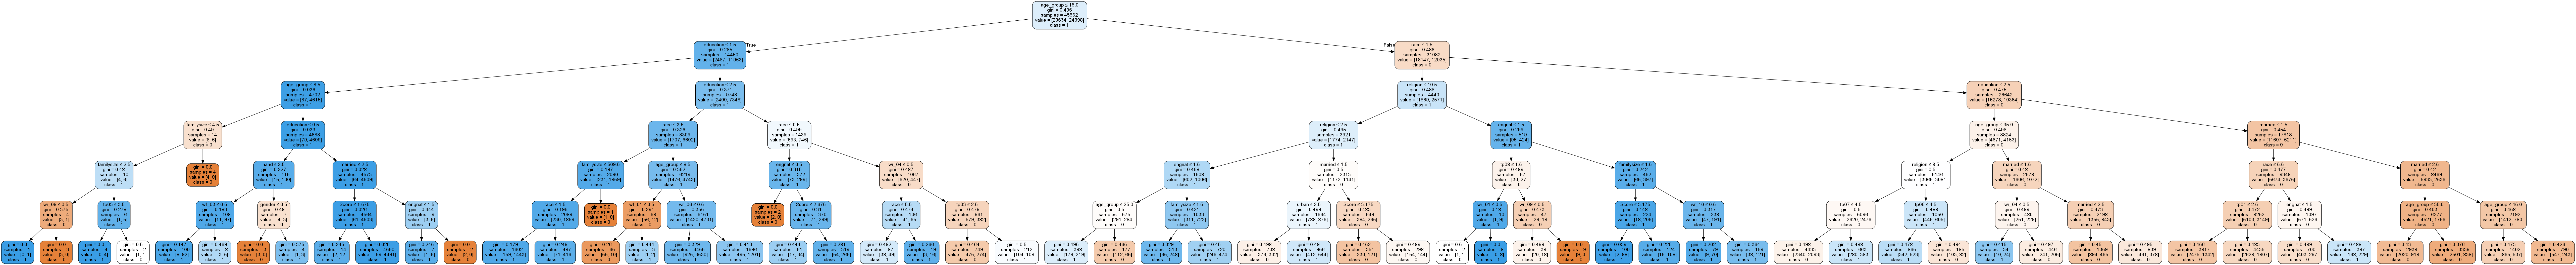

In [51]:
dot_data

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [52]:
train_no=train[train['voted']==1]

In [53]:
train_no.columns[41:]

Index(['age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13', 'Score'],
      dtype='object')

In [54]:
lis=['age_group', 'education', 'engnat', 'familysize', 'gender', 'hand','married', 'race', 'religion']

In [55]:
train1['age_group'].value_counts()
train1['voted']=train1['voted'].astype('category')

age=train1.groupby(['voted'])['age_group'].value_counts().unstack().T


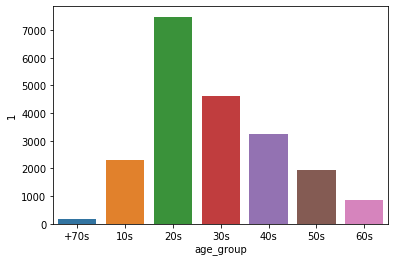

In [56]:
plt.subplot()
sns.barplot(x=age.index,y=1,data=age)

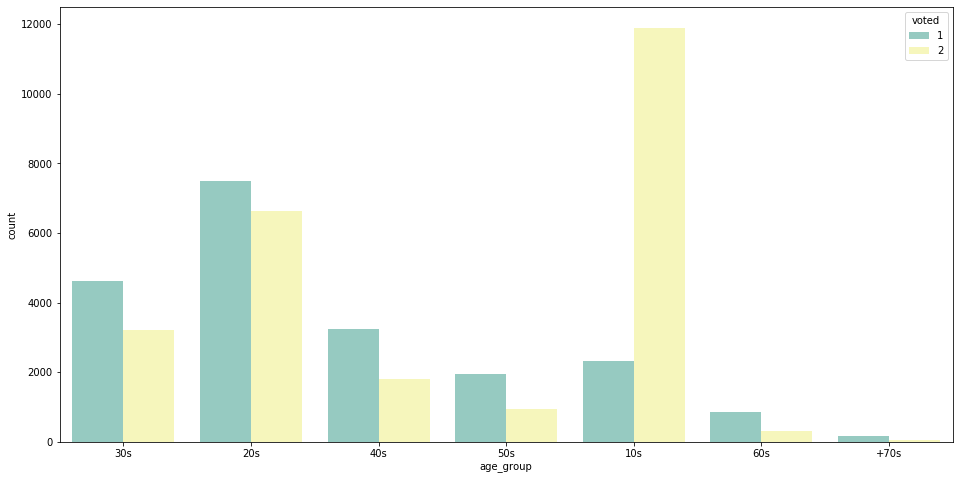

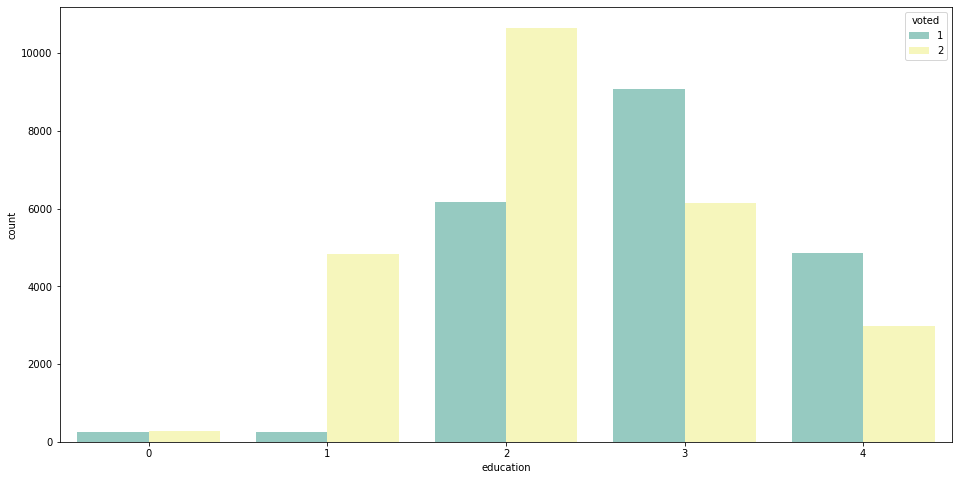

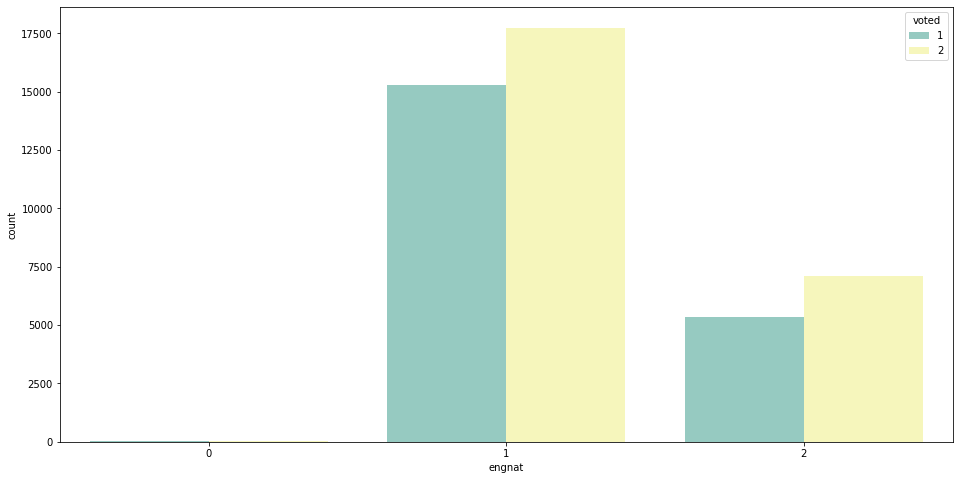

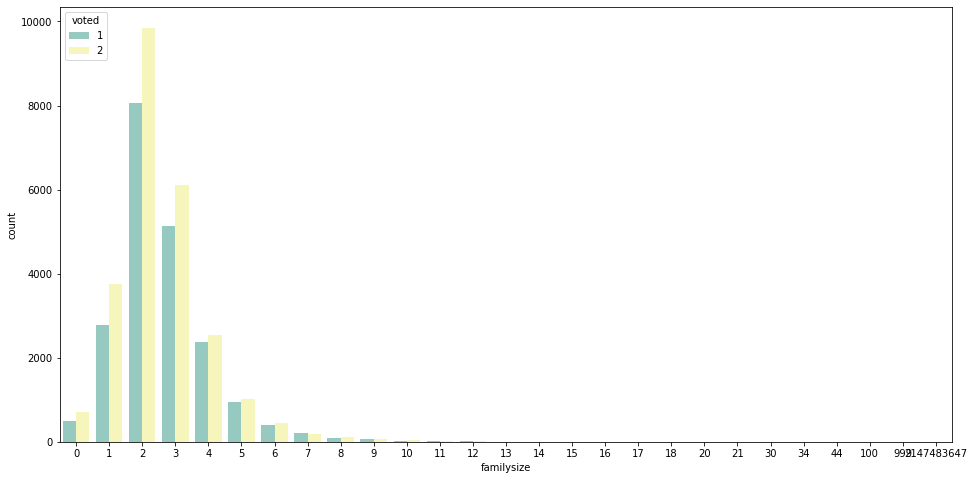

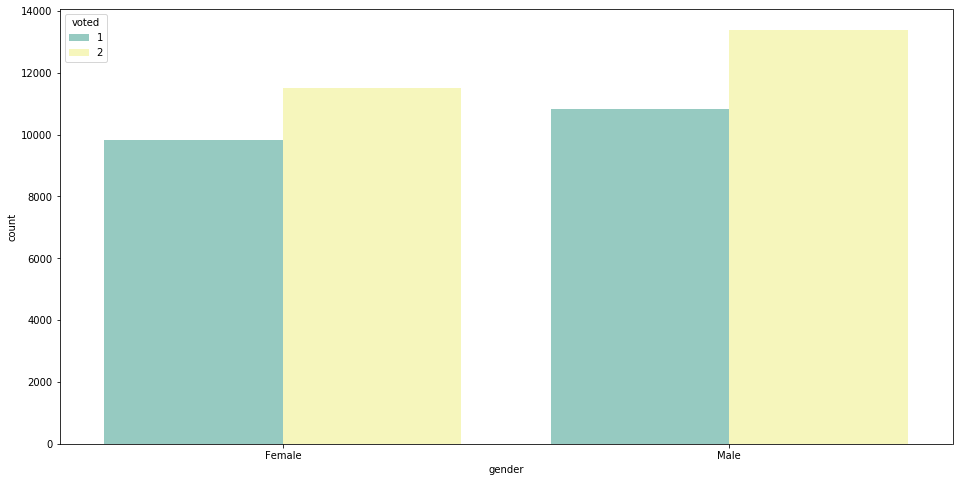

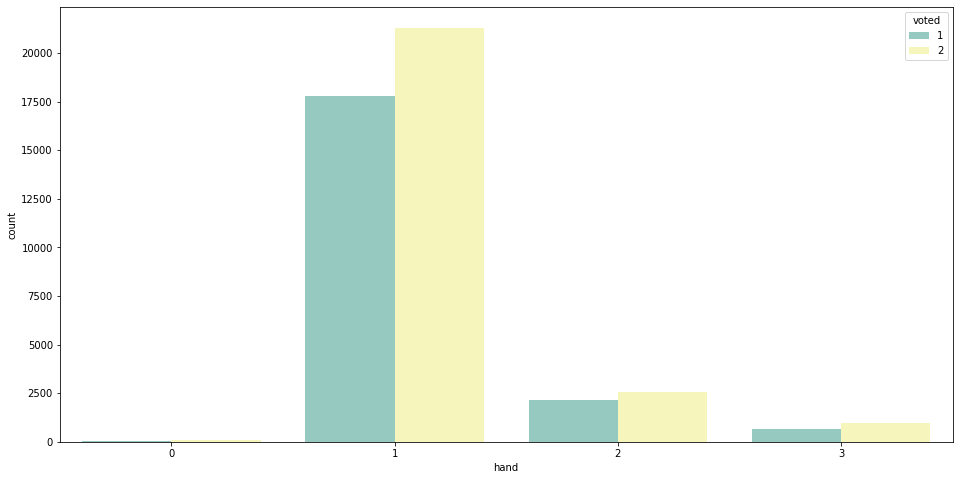

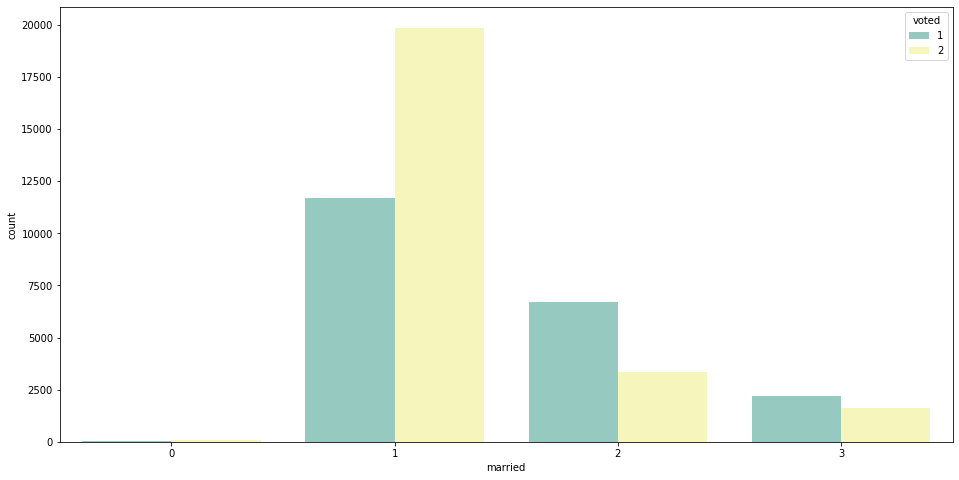

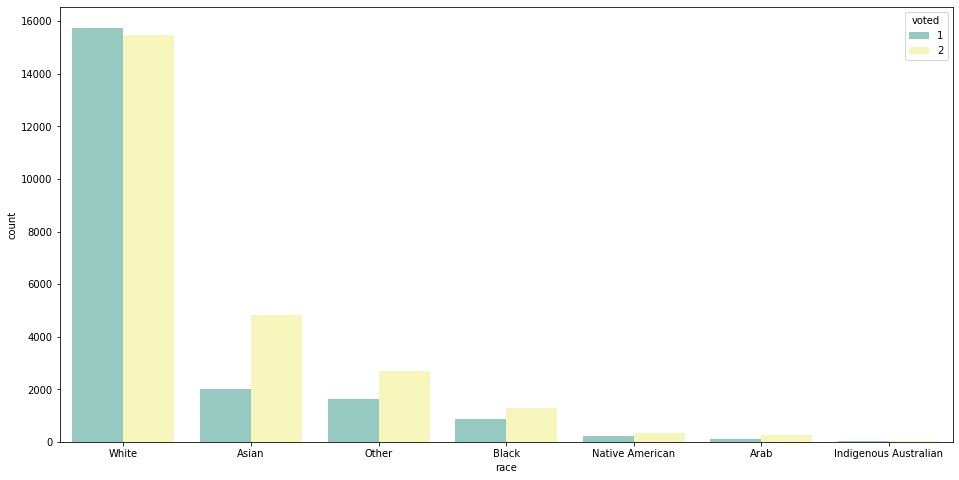

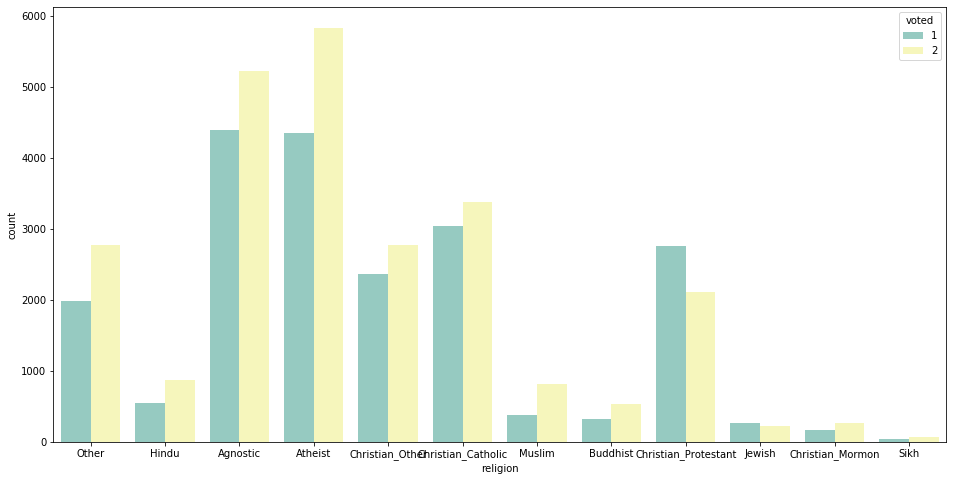

In [57]:
for i in lis:
    plt.figure(figsize=(16,8))
    sns.countplot(x=f'{i}',hue='voted',palette='Set3',data=train1)